<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Item Recommendation for smart city users

## Context
The dataset is derived from a survey conducted to obtain a precise insight concerning the citizens' reactions to different recommendations of various items in two different contexts. The respondents were asked to choose among a set of 18 recommendations those that they would be most interested in if it were proposed in two different contexts: on a sunny and warm (20°C) Saturday afternoon in Spring (referred to as the "Sun" context) and on a rainy and cold (8°C) Saturday afternoon in Winter (referred to as the "Rain" context).

The recommendations concerned various subjects : social or cultural events, discounts in restaurants, useful city information, etc. and people were asked in each context which they would like to receive as push notifications on their phones. For each context, respondents could give several or no responses.

## Objective
We will try to build user profiles and build a classification based recommendation model that could allow future applications both to simulate recommendation system algorithms, and to deduce clusters from the collected profiles.

## Data Description

The "item_description.csv" file represents the list of items that can be recommended by a recommender system in a Smart City. 


File description:

- The first column is the itemId. For example: "15" 
- The second column is the item description. For example: "Political news for your city or state" 
- The last 8 columns represent (as a binary vector) the category to which the item belongs.

The 'item_ratings.csv' file represents user ratings for recommended items. 

File description:

- The first column is the contextId. For example: "1077". 
- The second column is the itemId. For example: "1". 
- The third column is the rating given by the user to the corresponding item. A value of "0" represents a refused recommendation / "1" means an accepted recommendation. 
- The fourth column is the userId. For example : "1". For each contextId 18 items are rated. For each contextId we keep the corresponding userId.

The "user_preferences.csv" file represents the user descriptions given with their features vector. 


File description:

- The first column is the contextId. For example: "1077" 
- The second column is the age. For example: "34". 
- The next two dimensions are the gender. Example : 1;0 means a man, and 0;1 means a woman. 
- The next 13 dimensions are the Socio-Professional Category (SPC) represented as a binary vector. 
- The next 13 dimensions represents the user's specialties with a binary vector. 
- The next 10 dimensions are the user preferences represented as a binary vector. 
- The next 8 dimensions represents the user's highest degree. 
- The next 2 dimensions identifies the weather/season context. Sun "1;0 and Rain "0;1". 
- The last column is the userId. For example: "1"

## Table of Content

1. Import Libraries

2. Read Data

3. Data Analysis and EDA

*   Item Description Data
*   Item Ratings item
*   Users Data

4. Data Preparation

5. Model building - Classification
6. Model building - Collaborative Filtering

7. Prediction and Recommendation

8. Conclusion and Interpretation

## 1. Import Libraries

In [8]:
!pip install surprise

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib 
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = [10, 8]
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import math
import seaborn as sns


# set seed for reproducibility
np.random.seed(0)

## 2. Loading the Data

In [4]:
path = '/content/drive/My Drive/AIML_RS_CSV/aiml/Lab/ggn-batch/Recosys/'

In [5]:
df_items = pd.read_csv(path + 'item_description.csv')
df_users = pd.read_csv(path + 'user_preferences.csv')
df_ratings = pd.read_csv(path+ 'item_ratings.csv')

## 3. Data Analysis and EDA

### 3.1 Items Data

Read and understand the data

In [6]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   itemId    18 non-null     int64 
 1   itemDesc  18 non-null     object
 2   item1     18 non-null     int64 
 3   item2     18 non-null     int64 
 4   item3     18 non-null     int64 
 5   item4     18 non-null     int64 
 6   item5     18 non-null     int64 
 7   item6     18 non-null     int64 
 8   item7     18 non-null     int64 
 9   item8     18 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.5+ KB


In [7]:
df_items

,itemId,itemDesc,item1,item2,item3,item4,item5,item6,item7,item8
0,1,Various sports activities proposal,1,0,0,0,0,0,0,0
1,2,The results of your favorite sports team,1,0,0,0,0,0,0,0
2,3,A concert of your favorite band,0,1,0,0,0,0,0,0
3,4,A concert of a symphony orchestra,0,1,0,0,0,0,0,0
4,5,A discount for your favorite clothes store,0,0,1,0,0,0,0,0
5,6,A discount for your favorite bookshop,0,0,0,1,0,0,0,0
6,7,A discount for your favorite pub,0,0,0,0,1,0,0,0
7,8,A discount for your favorite restaurant,0,0,0,0,1,0,0,0
8,9,An exhibition about your favorite author,0,0,0,1,0,0,0,0
9,10,"The time of your next bus, tram, or subway (in...",0,0,0,0,0,1,0,0


Q- Make a column called item category and add it to the items dataframe

In [8]:
df_items['cat'] = [1,1,2,2,3,4,5,5,4,6,6,7,7,6,8,8,8,7]
df_items

,itemId,itemDesc,item1,item2,item3,item4,item5,item6,item7,item8,cat
0,1,Various sports activities proposal,1,0,0,0,0,0,0,0,1
1,2,The results of your favorite sports team,1,0,0,0,0,0,0,0,1
2,3,A concert of your favorite band,0,1,0,0,0,0,0,0,2
3,4,A concert of a symphony orchestra,0,1,0,0,0,0,0,0,2
4,5,A discount for your favorite clothes store,0,0,1,0,0,0,0,0,3
5,6,A discount for your favorite bookshop,0,0,0,1,0,0,0,0,4
6,7,A discount for your favorite pub,0,0,0,0,1,0,0,0,5
7,8,A discount for your favorite restaurant,0,0,0,0,1,0,0,0,5
8,9,An exhibition about your favorite author,0,0,0,1,0,0,0,0,4
9,10,"The time of your next bus, tram, or subway (in...",0,0,0,0,0,1,0,0,6


In [9]:
user_cat = {1: 1,  2:1, 3: 2, 4:2, 5:3, 6:4, 7:5, 8:5, 9:4, 10:6, 11:6, 12:7, 13:7, 14:6, 15:8, 16:8, 17:8, 18:7 }

#### There are 18 items belonging to 8 categories that can be recommended by the recommender system.

### 3.2 Item Ratings Data

In [10]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38736 entries, 0 to 38735
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   contextId  38736 non-null  int64
 1   itemId     38736 non-null  int64
 2   rating     38736 non-null  int64
 3   userId     38736 non-null  int64
dtypes: int64(4)
memory usage: 1.2 MB


In [11]:
df_ratings.shape

(38736, 4)

In [12]:
df_ratings['rating'].value_counts()

0    26653
1    12083
Name: rating, dtype: int64

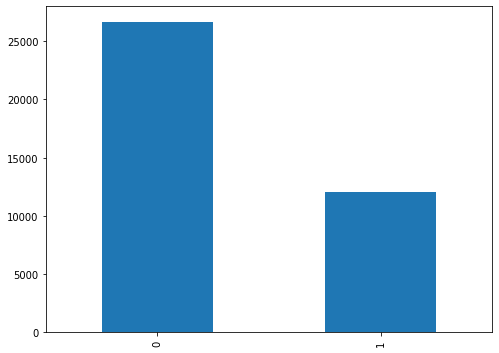

In [13]:
df_ratings['rating'].value_counts().plot(kind='bar', figsize=(8,6))

- There are 38736 ratings having contextid, itemid, userid
- 26653 recommendations are refused, 12083 are accepted by the users for a particular item

In [14]:
df_ratings.head()

,contextId,itemId,rating,userId
0,1,1,1,1
1,1,2,1,1
2,1,3,0,1
3,1,4,0,1
4,1,5,0,1


- Make a column called context and add two weather (context) to it. Context =1 for contextId <1077 

In [15]:
df_ratings['context'] = df_ratings['contextId'].apply(lambda x: 1 if x< 1077 else 0)
df_ratings.sample(10)

,contextId,itemId,rating,userId,context
18636,1036,7,1,1036,1
14497,806,8,0,806,1
24575,1366,6,0,290,0
14288,794,15,0,794,1
17546,975,15,1,975,1
8566,476,17,0,476,1
13253,737,6,0,737,1
16580,922,3,1,922,1
14344,797,17,0,797,1
29375,1632,18,0,556,0


In [16]:
pd.crosstab(df_ratings['context'], df_ratings['rating'])

rating,0,1
context,,
0,13550,5818
1,13103,6265


Context is not a strong feature here. Most of the ratings are low on both the context (weather)

In [17]:
df_ratings.isna().sum()

contextId    0
itemId       0
rating       0
userId       0
context      0
dtype: int64

In [18]:
df_ratings['userId'].nunique()

1076

In [19]:
df_ratings['contextId'].nunique()

2152

In [20]:
df_ratings['itemId'].nunique()

18

- There are 1076 unique users
- Each user has rated 18 items for two different contextId
- There are two contexts
- 2 context * 18 items * 1076 users = 38736 ratings

Check for popular users ( who have rated high number of the products)

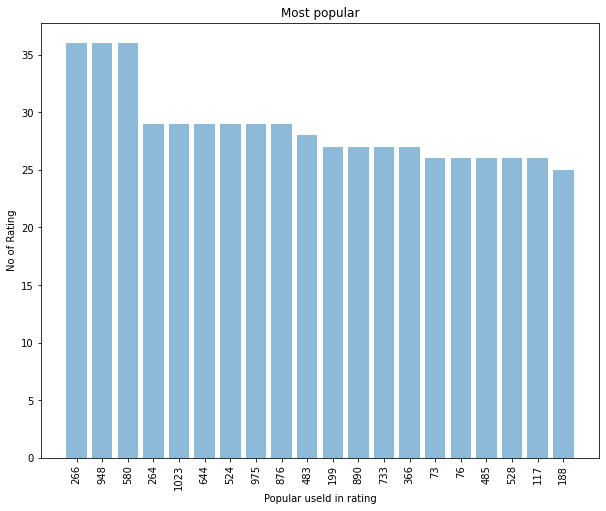

In [21]:
popular = df_ratings[['userId','rating']].groupby('userId').sum().reset_index()
popular_20 = popular.sort_values('rating', ascending=False).head(n=20)

obj = (list(popular_20['userId']))
y_pos = np.arange(len(obj))
performance = list(popular_20['rating'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, obj, rotation='vertical')
plt.xlabel('Popular useId in rating')
plt.ylabel('No of Rating')
plt.title('Most popular')
 
plt.show()

Let's check mean ratings of users and items

### Popularity Based

In [22]:
# let's check how many rating does an item has

item_ratings= pd.DataFrame(df_ratings.groupby('itemId')['rating'].mean())

item_ratings['Number_Of_Ratings']= pd.DataFrame(df_ratings.groupby('itemId')['rating'].count())

item_ratings.sort_values('rating',ascending=False).head(10)

,rating,Number_Of_Ratings
itemId,,
7,0.592472,2152
10,0.559480,2152
8,0.542286,2152
11,0.428439,2152
5,0.395911,2152
3,0.368959,2152
6,0.339219,2152
13,0.332714,2152
14,0.289498,2152


In [23]:
item_ratings.sort_values('rating').head(10)

,rating,Number_Of_Ratings
itemId,,
15,0.110595,2152
9,0.130576,2152
4,0.157993,2152
2,0.170539,2152
17,0.209108,2152
16,0.219331,2152
18,0.219796,2152
1,0.271375,2152
12,0.276487,2152


- Item 7 has the highest rating.
- Item 15, 9 are least popular.

In [24]:
item_ratings= pd.DataFrame(df_ratings.groupby('userId')['rating'].mean())
item_ratings.sort_values('rating',ascending=False).head(10)

,rating
userId,
266,1.000000
948,1.000000
580,1.000000
264,0.805556
1023,0.805556
644,0.805556
524,0.805556
975,0.805556
876,0.805556


In [25]:
item_ratings.sort_values('rating').head(5)

,rating
userId,
656,0.055556
729,0.055556
1061,0.055556
570,0.055556
658,0.055556


- User 266, 948, 580 has mean rating as 1

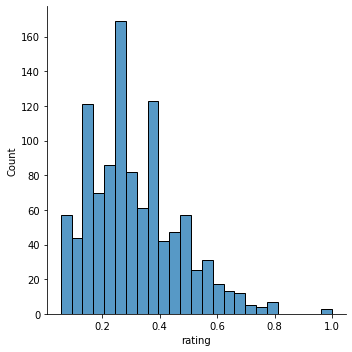

In [26]:
sns.displot(item_ratings.rating);

In [27]:
df_ratings.head(2)

,contextId,itemId,rating,userId,context
0,1,1,1,1,1
1,1,2,1,1,1


In [28]:
item_cat = {1: 1,  2:1, 3: 2, 4:2, 5:3, 6:4, 7:5, 8:5, 9:4, 10:6, 11:6, 12:7, 13:7, 14:6, 15:8, 16:8, 17:8, 18:7 }
df_ratings['item_cat'] = df_ratings['itemId'].replace(item_cat)

In [29]:
df_ratings.head(5)

,contextId,itemId,rating,userId,context,item_cat
0,1,1,1,1,1,1
1,1,2,1,1,1,1
2,1,3,0,1,1,2
3,1,4,0,1,1,2
4,1,5,0,1,1,3


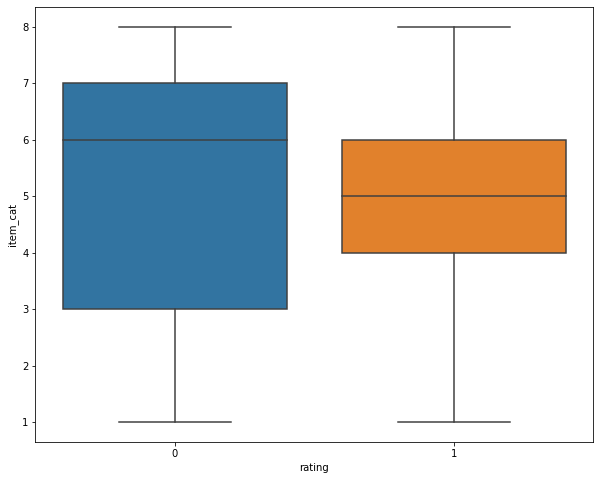

In [30]:
sns.boxplot(x= df_ratings['rating'], y = df_ratings['item_cat'])

### 3.3 User Preferences Data

In [31]:

df_users.shape

(2152, 51)

In [32]:
df_users.columns

Index(['contextId', 'age', 'man', 'woman', 'SPC1', 'SPC2', 'SPC3', 'SPC4',
       'SPC5', 'SPC6', 'SPC7', 'SPC8', 'SPC9', 'SPC10', 'SPC11', 'SPC12',
       'SPC13', 'userSpecialty1', 'userSpecialty2', 'userSpecialty3',
       'userSpecialty4', 'userSpecialty5', 'userSpecialty6', 'userSpecialty7',
       'userSpecialty8', 'userSpecialty9', 'userSpecialty10',
       'userSpecialty11', 'userSpecialty12', 'userSpecialty13',
       'userPreference1', 'userPreference2', 'userPreference3',
       'userPreference4', 'userPreference5', 'userPreference6',
       'userPreference7', 'userPreference8', 'userPreference9',
       'userPreference10', 'userHighDegree1', 'userHighDegree2',
       'userHighDegree3', 'userHighDegree4', 'userHighDegree5',
       'userHighDegree6', 'userHighDegree7', 'userHighDegree8',
       'weatherSeason1', 'weatherSeason2', 'userId'],
      dtype='object')

In [33]:
df_users.duplicated().sum()

0

In [34]:
df_users['man'].value_counts()

1    1302
0     850
Name: man, dtype: int64

In [35]:
df_users['woman'].value_counts()

0    1302
1     850
Name: woman, dtype: int64

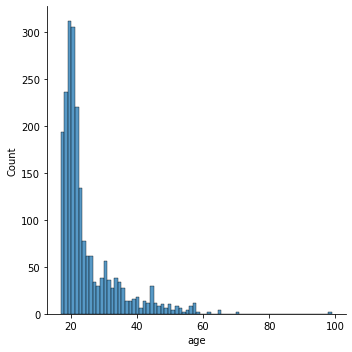

In [36]:
sns.displot(df_users['age'])

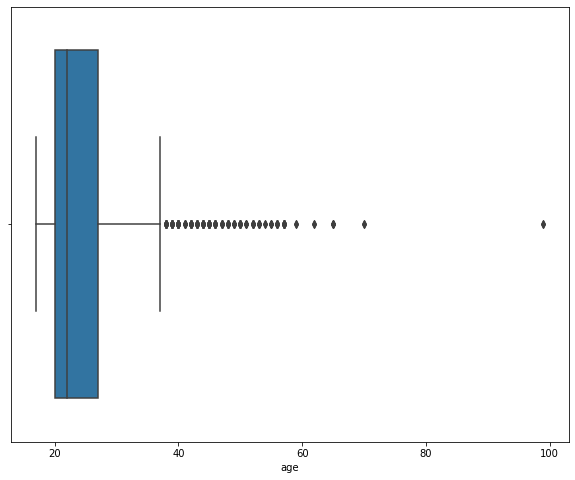

In [37]:
sns.boxplot(x = df_users['age'])

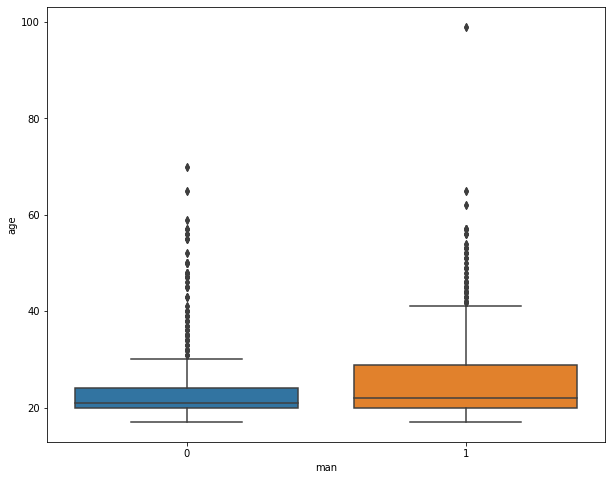

In [38]:
sns.boxplot(x = df_users['man'], y= df_users['age'])

In [39]:
df_users.describe()

,contextId,age,man,woman,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason1,weatherSeason2,userId
count,2152.00000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.0,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.00000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000
mean,1076.50000,25.203532,0.605019,0.394981,0.687732,0.000929,0.062268,0.141264,0.0,0.017658,0.008364,0.009294,0.058550,0.001859,0.002788,0.007435,0.001859,0.761152,0.024164,0.058550,0.012082,0.035316,0.110595,0.020446,0.038104,0.369888,0.162639,0.077138,0.013011,0.082714,0.593866,0.655204,0.204461,0.532528,0.406134,0.614312,0.389405,0.16171,0.286245,0.090149,0.002788,0.168216,0.181227,0.193309,0.145911,0.249071,0.039963,0.019517,0.500000,0.500000,538.500000
std,621.37321,8.917851,0.488960,0.488960,0.463526,0.030478,0.241697,0.348375,0.0,0.131736,0.091094,0.095977,0.234835,0.043083,0.052741,0.085925,0.043083,0.426479,0.153592,0.234835,0.109277,0.184620,0.313703,0.141553,0.191492,0.482886,0.369122,0.266872,0.113348,0.275513,0.491224,0.475412,0.403401,0.499057,0.491224,0.486870,0.487729,0.36827,0.452111,0.286461,0.052741,0.374145,0.385295,0.394985,0.353099,0.432575,0.195917,0.138364,0.500116,0.500116,310.686505
min,1.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,538.75000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,269.750000
50%,1076.50000,22.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,538.500000
75%,1614.25000,27.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,807.250000
max,2

In [40]:
df_users[df_users['age']==99]

,contextId,age,man,woman,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason1,weatherSeason2,userId
579,580,99,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,580
1655,1656,99,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1,580


In [41]:
users = df_users.drop(['contextId','woman', 'userId','weatherSeason1', 'weatherSeason2'], axis=1)

In [42]:
users.head(2)

,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8
0,34,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,32,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0


86 users seem to have similar preferences

In [43]:
# initiate and fit StandardScaler function
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 


column_trans = ColumnTransformer([('scaler', StandardScaler(),['age'])], remainder='passthrough') 
data = column_trans.fit_transform(users)

data = pd.DataFrame(data, columns= users.columns)
data.head()

,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8
0,0.986618,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.762297,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.996064,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.762297,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.669029,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
data.columns[1:46]

Index(['man', 'SPC1', 'SPC2', 'SPC3', 'SPC4', 'SPC5', 'SPC6', 'SPC7', 'SPC8',
       'SPC9', 'SPC10', 'SPC11', 'SPC12', 'SPC13', 'userSpecialty1',
       'userSpecialty2', 'userSpecialty3', 'userSpecialty4', 'userSpecialty5',
       'userSpecialty6', 'userSpecialty7', 'userSpecialty8', 'userSpecialty9',
       'userSpecialty10', 'userSpecialty11', 'userSpecialty12',
       'userSpecialty13', 'userPreference1', 'userPreference2',
       'userPreference3', 'userPreference4', 'userPreference5',
       'userPreference6', 'userPreference7', 'userPreference8',
       'userPreference9', 'userPreference10', 'userHighDegree1',
       'userHighDegree2', 'userHighDegree3', 'userHighDegree4',
       'userHighDegree5', 'userHighDegree6', 'userHighDegree7',
       'userHighDegree8'],
      dtype='object')

In [45]:
for i in data.columns[1:46]:
  freq = (data.groupby(i).size()) / len(data)
  data[i] = data[i].apply(lambda x : freq[x])

In [46]:
data.sample(10)

,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8
730,-0.583632,0.394981,0.687732,0.999071,0.937732,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.630112,0.837361,0.922862,0.986989,0.917286,0.593866,0.655204,0.795539,0.532528,0.406134,0.385688,0.610595,0.83829,0.713755,0.909851,0.997212,0.831784,0.818773,0.193309,0.854089,0.750929,0.960037,0.980483
1858,-0.583632,0.394981,0.687732,0.999071,0.937732,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.630112,0.837361,0.922862,0.986989,0.917286,0.406134,0.655204,0.795539,0.532528,0.406134,0.614312,0.610595,0.83829,0.713755,0.909851,0.997212,0.831784,0.818773,0.193309,0.854089,0.750929,0.960037,0.980483
937,-0.471471,0.605019,0.687732,0.999071,0.937732,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.630112,0.837361,0.922862,0.986989,0.917286,0.593866,0.344796,0.795539,0.467472,0.406134,0.614312,0.610595,0.16171,0.286245,0.909851,0.997212,0.831784,0.181227,0.806691,0.854089,0.750929,0.960037,0.980483
326,-0.471471,0.605019,0.687732,0.999071,0.937732,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.238848,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.369888,0.837361,0.922862,0.986989,0.917286,0.406134,0.655204,0.795539,0.467472,0.593866,0.614312,0.610595,0.83829,0.713755,0.909851,0.997212,0.831784,0.181227,0.806691,0.854089,0.750929,0.960037,0.980483
225,-0.583632,0.394981,0.687732,0.999071,0.937732,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.238848,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.369888,0.837361,0.922862,0.986989,0.917286,0.406134,0.655204,0.204461,0.467472,0.593866,0.614312,0.389405,0.83829,0.286245,0.090149,0.997212,0.831784,0.181227,0.806691,0.854089,0.750929,0.960037,0.980483
369,-0.695792,0.605019,0.687732,0.999071,0.937732,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.630112,0.837361,0.922862,0.986989,0.917286,0.406134,0.655204,0.795539,0.532528,0.406134,0.614312,0.610595,0.83829,0.713755,0.909851,0.997212,0.168216,0.818773,0.806691,0.854089,0.750929,0.960037,0.980483
1143,0.650136,0.605019,0.312268,0.999071,0.937732,0.858736,1.0,0.017658,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.238848,0.975836,0.05855,0.987918,0.964684,0.110595,0.979554,0.961896,0.369888,0.837361,0.922862,0.986989,0.917286,0.593866,0.344796,0.795539,0.532528,0.593866,0.614312,0.610595,0.16171,0.713755,0.090149,0.997212,0.831784,0.818773,0.806691,0.854089,0.249071,0.960037,0.980483
829,-0.695792,0.605019,0.687732,0.999071,0.937732,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.630112,0.837361,0.922862,0.986989,0.917286,0.406134,0.344796,0.795539,0.467472,0.593866,0.614312,0.610595,0.83829,0.713755,0.909851,0.997212,0.831784,0.818773,0.193309,0.854089,0.750929,0.960037,0.980483
1594,0.201493,0.605019,0.312268,0.999071,0.937732,0.141264,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.

In [47]:
from sklearn.cluster import KMeans
# Using the elbow method to find the optimal number of clusters
wcss =[]
for i in range (1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

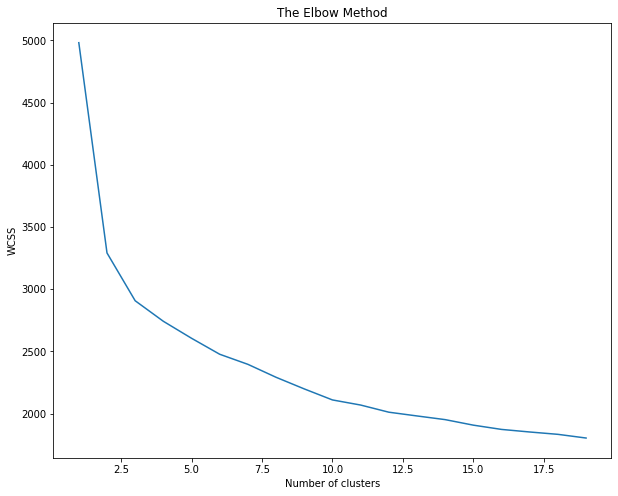

In [48]:
# Plot the graph to visualize the optimal number of cluster through the Elbow Method
plt.plot(range(1,20),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
#using silhouette score: Higher the value, better the cluster. Earlier run suggested 3
from sklearn.metrics import silhouette_score
# create a list for different values of K
n_clusters = [4, 5, 6,7,8,9, 10, 11, 12, 15,17]

# use 'for' loop to build the clusters
# 'random_state' creates the sample in the same order 
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(data)
    
    score = silhouette_score(data, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 4, silhouette score is 0.11772356084376143)
For n_clusters = 5, silhouette score is 0.15143597332747183)
For n_clusters = 6, silhouette score is 0.15786178578773047)
For n_clusters = 7, silhouette score is 0.2026026467967878)
For n_clusters = 8, silhouette score is 0.1997626826815946)
For n_clusters = 9, silhouette score is 0.21103841437867538)
For n_clusters = 10, silhouette score is 0.21183039193952527)
For n_clusters = 11, silhouette score is 0.2131554921561575)
For n_clusters = 12, silhouette score is 0.21705855351444128)
For n_clusters = 15, silhouette score is 0.2253797913150622)
For n_clusters = 17, silhouette score is 0.22413025268543674)


In [50]:
#run raw cluster algo
kmeans = KMeans(n_clusters=7, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 10)
kmeans = kmeans.fit(data)

In [51]:
# add a column 'cluster' in the data giving cluster number corresponding to each observation
df_users['cluster'] = kmeans.labels_

In [52]:
df_users.head(2)

,contextId,age,man,woman,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason1,weatherSeason2,userId,cluster
0,1,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,4
1,2,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,2,4


In [53]:
df_users[df_users['userId']==948]

,contextId,age,man,woman,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason1,weatherSeason2,userId,cluster
947,948,19,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,948,2
2023,2024,19,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,948,2


In [54]:
df_users.shape

(2152, 52)

In [55]:
df_users['contextId'].nunique()

2152

In [56]:
df_users['userId'].nunique()

1076

## 4. Data Preparation

Steps:-
- No need of items data
- 1. Ratings data:- only drop contextID
- 2. User data:- drop "woman", "weatherseason1", "weatherseason2", "contextId"
- 3. Droppping duplicated users data
- 4. Merge ratings and unique users
- 5. X and y

In [57]:
df_items.head(2)

,itemId,itemDesc,item1,item2,item3,item4,item5,item6,item7,item8,cat
0,1,Various sports activities proposal,1,0,0,0,0,0,0,0,1
1,2,The results of your favorite sports team,1,0,0,0,0,0,0,0,1


In [58]:
df_ratings.head(2)

,contextId,itemId,rating,userId,context,item_cat
0,1,1,1,1,1,1
1,1,2,1,1,1,1


In [59]:
df_ratings = df_ratings.drop(['contextId'], axis=1)
df_ratings.head(2)

,itemId,rating,userId,context,item_cat
0,1,1,1,1,1
1,2,1,1,1,1


In [60]:
df_ratings.shape

(38736, 5)

In [61]:
df_users.head(2)

,contextId,age,man,woman,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason1,weatherSeason2,userId,cluster
0,1,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,4
1,2,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,2,4


In [62]:
user_data = df_users.drop(['contextId', 'woman','weatherSeason1','weatherSeason2' ], axis=1)
user_data.head(2)

,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,userId,cluster
0,34,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,4
1,32,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,2,4


In [63]:
df_users.duplicated().sum()

0

Let's make one dataframe having userId, itemId, itemCat, context/weather, user spcs, and user cluster label.

- We dont need df_items dataframe
- We will join df_ratings (context, itemId, userId, rating) and df_users (spc, cluster label)

In [64]:
user_data[user_data['userId']==1]

,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,userId,cluster
0,34,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,4
1076,34,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,4


In [95]:
user_data[user_data.duplicated()].shape

(1076, 48)

In [65]:
user_unique = user_data.drop_duplicates()
user_unique.shape

(1076, 48)

In [66]:
user_unique.head(2)

,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,userId,cluster
0,34,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,4
1,32,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,2,4


In [67]:
df_ratings.head(2)

,itemId,rating,userId,context,item_cat
0,1,1,1,1,1
1,2,1,1,1,1


In [89]:
df_ratings.shape  ###### 18 items * 2 context* 1076 users

(38736, 5)

In [91]:
user_unique.shape  #### unique user characteristics

(1076, 48)

In [68]:
dff = pd.merge(df_ratings, user_unique, how='inner', on ='userId')
dff.shape

(38736, 52)

In [93]:
user_unique.columns

Index(['age', 'man', 'SPC1', 'SPC2', 'SPC3', 'SPC4', 'SPC5', 'SPC6', 'SPC7',
       'SPC8', 'SPC9', 'SPC10', 'SPC11', 'SPC12', 'SPC13', 'userSpecialty1',
       'userSpecialty2', 'userSpecialty3', 'userSpecialty4', 'userSpecialty5',
       'userSpecialty6', 'userSpecialty7', 'userSpecialty8', 'userSpecialty9',
       'userSpecialty10', 'userSpecialty11', 'userSpecialty12',
       'userSpecialty13', 'userPreference1', 'userPreference2',
       'userPreference3', 'userPreference4', 'userPreference5',
       'userPreference6', 'userPreference7', 'userPreference8',
       'userPreference9', 'userPreference10', 'userHighDegree1',
       'userHighDegree2', 'userHighDegree3', 'userHighDegree4',
       'userHighDegree5', 'userHighDegree6', 'userHighDegree7',
       'userHighDegree8', 'userId', 'cluster'],
      dtype='object')

In [69]:
dff.head(2)

,itemId,rating,userId,context,item_cat,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,cluster
0,1,1,1,1,1,34,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,4
1,2,1,1,1,1,34,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,4


In [70]:
X = dff.drop(['itemId','userId','rating'], axis=1)
y = dff['rating']

In [92]:
y.value_counts()

0    26653
1    12083
Name: rating, dtype: int64

In [96]:
X.head(2)

,context,item_cat,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,cluster
0,1,1,34,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,4
1,1,1,34,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,4


## 5. Model Building - Classification

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=100)

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

# Model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Accuracy
model_Train=model.score(X_train, y_train)
model_Test=model.score(X_test, y_test)


Pred = model.predict(X_test)
Recall = recall_score(y_test,Pred,average="binary", pos_label=1)

print(model_Train)
print(model_Test)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, Pred))

0.881910381707542
0.7093193356853972
Confusion Matrix:
 [[6621 1436]
 [1942 1622]]


In [74]:
resultsDf = pd.DataFrame({'Method':['Decision'], 'Train Accuracy': model_Train, 'Test Accuracy': model_Test , 'Recall': Recall})
resultsDf = resultsDf[['Method', 'Train Accuracy', 'Test Accuracy', 'Recall']]
resultsDf

,Method,Train Accuracy,Test Accuracy,Recall
0,Decision,0.88191,0.709319,0.455107


### 6. Collaborative Model

In [75]:
df_final = dff[['itemId','userId', 'context','rating']]
df_final.head(2)

,itemId,userId,context,rating
0,1,1,1,1
1,2,1,1,1


In [97]:
from surprise import Dataset,Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(0, 1))

data = Dataset.load_from_df(df_final[['userId', 'itemId', 'rating']], reader)

In [99]:
# Split data to train and test
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=.3,random_state=123)

In [100]:
svd_model = SVD(n_factors=50, biased=False)

svd_model.fit(trainset)

test_pred = svd_model.test(testset)

In [102]:
test_pred[:10]

[Prediction(uid=554, iid=10, r_ui=1.0, est=0.3340206392178188, details={'was_impossible': False}),
 Prediction(uid=972, iid=17, r_ui=0.0, est=0.14597498084539828, details={'was_impossible': False}),
 Prediction(uid=293, iid=13, r_ui=0.0, est=0.1034980129160244, details={'was_impossible': False}),
 Prediction(uid=748, iid=1, r_ui=0.0, est=0.2720359127410385, details={'was_impossible': False}),
 Prediction(uid=991, iid=8, r_ui=0.0, est=0.27164660104140725, details={'was_impossible': False}),
 Prediction(uid=460, iid=3, r_ui=1.0, est=0.4072313509861677, details={'was_impossible': False}),
 Prediction(uid=606, iid=12, r_ui=0.0, est=0.17620828121742121, details={'was_impossible': False}),
 Prediction(uid=915, iid=18, r_ui=0.0, est=0.2036313396199659, details={'was_impossible': False}),
 Prediction(uid=362, iid=12, r_ui=0.0, est=0.0613248292708871, details={'was_impossible': False}),
 Prediction(uid=1047, iid=14, r_ui=0.0, est=0.17900174772908808, details={'was_impossible': False})]

In [107]:
pred_df.head(5)

,uid,iid,r_ui,est,details
0,554,10,1.0,0.334021,{'was_impossible': False}
1,972,17,0.0,0.145975,{'was_impossible': False}
2,293,13,0.0,0.103498,{'was_impossible': False}
3,748,1,0.0,0.272036,{'was_impossible': False}
4,991,8,0.0,0.271647,{'was_impossible': False}


In [117]:
pred_df.shape

(11621, 5)

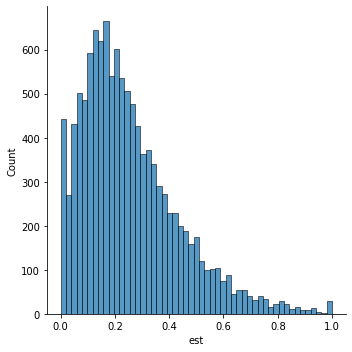

In [116]:
pred_df = pd.DataFrame(test_pred)
sns.displot(pred_df['est'])

In [104]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 0.4273


0.4272643446218387

In [82]:
# compute RMSE
accuracy.mae(test_pred)

MAE:  0.3412


0.3412078988851801

In [105]:
accuracy.fcp(test_pred)

FCP:  0.6881


0.6881214559256355

In [84]:
from surprise.model_selection import cross_validate, train_test_split
from surprise import SVD, Dataset, Reader, KNNWithMeans
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), KNNWithMeans(k=20)]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
KNNWithMeans,0.383937,1.207659,8.76856
SVD,0.414168,1.782927,0.07017


## 7. Prediction and Recommendation

In [114]:
#  Function to return number of items rated by given user 

def get_Iu(uid):
       # uid: the id of the user
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:
        return 0
   #    return the number of items rated by the user
    
# Function to return number of users that have rated given item

def get_Ui(iid):
    #  iid: the raw id of the item
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    #   return the number of users that have rated the item.
    
 # Getting Top Predictions based upon Error between Actual and predicted   
df = pd.DataFrame(test_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)

df['err'] = abs(df.est - df.rui)

best_predictions = df.sort_values(by='err')
#best_predictions

In [115]:
best_predictions['err'].value_counts()

0.000000    235
1.000000     37
0.828268      2
0.184352      2
0.777575      2
           ... 
0.100622      1
0.101176      1
0.322955      1
0.157647      1
0.500117      1
Name: err, Length: 9933, dtype: int64

In [112]:
pred_df.sample(10)

,uid,iid,r_ui,est,details
449,993,6,0.0,0.433596,{'was_impossible': False}
2308,403,3,1.0,0.284993,{'was_impossible': False}
7080,949,9,0.0,0.010100,{'was_impossible': False}
9464,846,8,1.0,0.726248,{'was_impossible': False}
10873,61,11,1.0,0.350107,{'was_impossible': False}
3858,46,2,0.0,0.000000,{'was_impossible': False}
2618,793,17,0.0,0.172802,{'was_impossible': False}
8641,358,1,1.0,0.326126,{'was_impossible': False}
11146,760,3,0.0,0.018403,{'was_impossible': False}
3258,526,18,0.0,0.246122,{'was_impossible': False}


In [108]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [109]:
top_n = get_top_n(test_pred, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

554 [7, 7, 10, 5, 11, 3, 13, 18, 18, 16]
972 [8, 7, 3, 1, 5, 2, 16, 17, 9]
293 [7, 10, 1, 1, 2, 18, 13, 17, 12, 9]
748 [10, 7, 11, 3, 13, 12, 17, 1, 4, 9]
991 [7, 8, 12, 16, 16, 17, 13, 18, 1, 15]
460 [8, 7, 11, 3, 3, 10, 6, 6, 1, 16]
606 [7, 7, 13, 5, 5, 6, 12, 1, 16, 4]
915 [7, 11, 5, 6, 14, 13, 12, 18, 18, 17]
362 [11, 11, 7, 5, 3, 3, 17, 12, 12]
1047 [8, 8, 14, 5, 12, 2, 4, 13]
1011 [3, 8, 10, 11, 11, 13, 6, 14, 9, 17]
768 [11, 7, 6, 6, 5, 14, 3, 3, 2, 9]
250 [10, 11, 11, 5, 3, 13, 12, 12, 18, 1]
263 [7, 10, 5, 12, 12, 6, 13, 14, 1, 17]
612 [5, 7, 12, 14, 17, 17, 4, 9]
626 [8, 13, 13, 10, 12, 12, 11, 4, 4, 9]
416 [7, 10, 5, 13, 3, 6, 14, 14, 2, 1]
834 [7, 8, 1, 1, 10, 13, 11, 14, 12, 6]
505 [7, 7, 10, 8, 3, 11, 5, 13, 6, 12]
521 [10, 11, 8, 12, 5, 3, 17, 18, 6, 9]
665 [8, 3, 6, 7, 14, 18, 18, 17, 17, 5]
997 [7, 3, 6, 13, 13, 14, 14, 2, 17, 18]
1052 [11, 11, 12, 14, 3, 5, 6, 15, 2]
843 [10, 8, 6, 5, 14, 1, 13, 3, 17, 16]
137 [10, 11, 3, 13, 13, 6, 12, 12, 1, 17]
408 [8, 7, 7, 5, 5, 

## 8. Conclusion and Interpretation

- A simple classification model is not perfroming well because we do not item features and user features are not that different to each other.
- User-item relationship is not being accounted in the simple classification model
- Surprise does not provide a model to build a classifiaction model and hence we used a svd model to predict rating that is either 0 or 1. 
- Context info in not getting accounted in the svd collaborative model but since we have different ratings for different context, it may have been captured by the svd
- Here, we already have ratings of all the users for all the items. However, the SVD model can be simluated if we get new users and new items.
- We have recommended 10 ten items to a user based on their likeness for an item